# Interpolacion de Taylor
* La interpolación de Taylor es un método para aproximar una función utilizando una serie de Taylor centrada en un punto dado.

## La serie de Taylor de una función f(x) alrededor de un punto a es:

## f(x) ≈ f(a) + f'(a)(x - a) + f''(a)(x - a)^2 / 2! + f'''(a)(x - a)^3 / 3! + ... + f^n(a)(x - a)^n / n!

* donde f^n(a) es la derivada n-ésima de f en el punto a.

* En otras palabras, la serie de Taylor de f(x) es una suma infinita de términos, donde cada término es la derivada n-ésima de f evaluada en a, multiplicada por (x - a)^n y dividida por n!.

* La interpolación de Taylor utiliza un número finito de términos de esta serie para aproximar la función. Por ejemplo, un polinomio de Taylor de grado n para f(x) sería:

## f(x) ≈ f(a) + f'(a)(x - a) + f''(a)(x - a)^2 / 2! + ... + f^n(a)(x - a)^n / n!

* Este polinomio de Taylor proporciona una buena aproximación a f(x) cerca del punto a, pero la precisión de la aproximación disminuye a medida que x se aleja de a.

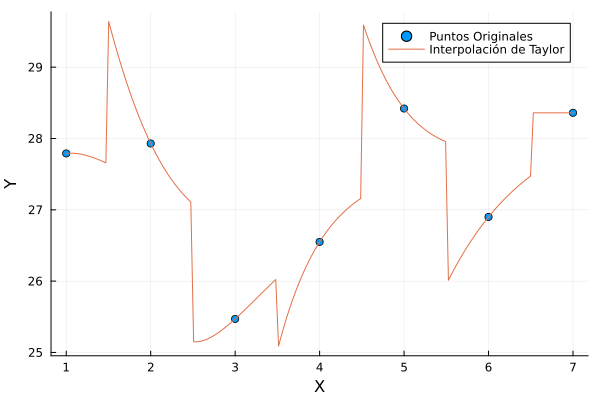

In [2]:
using Plots

ruta = "Datos.csv"
# Leemos la fila de datos como una cadena de texto desde el archivo CSV 
datos_str = read(ruta, String)
# Dividimos la cadena en substrings usando la coma como delimitador
datos_substrings = split(datos_str, ",")
# Convertimos los substrings en números de punto flotante
datos_xi = [1,2,3,4,5,6,7]
datos_yi = parse.(Float64, datos_substrings)

# Definimos una función para calcular el factorial
function mi_factorial(n)
    if n == 0
        return 1
    else
        return n * mi_factorial(n-1)
    end
end

# Definimos una función para calcular la derivada n-ésima usando diferencias finitas 
function derivada_n(datos_yi, x, n)
    h = 1 # El espaciado entre los puntos de datos es 1
    if n == 0
        return datos_yi[x]
    elseif x + 1 > length(datos_yi)
        return 0 # Devuelve 0 si x + 1 excede la longitud de datos_yi
    else
        return (derivada_n(datos_yi, x + 1, n - 1) - derivada_n(datos_yi, x, n - 1)) / h
    end
end

# Definir la función de interpolación de Taylor
function interpolacion_taylor(datos_yi, a, x, n)
    n = min(n, 6) # Aumentar el grado del polinomio de Taylor a 6
    suma = 0
    for i in 0:n
        suma += derivada_n(datos_yi, a, i) / mi_factorial(i) * (x - a)^i
    end
    return suma
end

# Generar puntos interpolados
x_interpolados = range(minimum(datos_xi), stop=maximum(datos_xi), length=180)
y_interpolados = [interpolacion_taylor(datos_yi, round(Int, x), x, 6) for x in x_interpolados]  # Usar un polinomio de grado 6

# Graficar puntos originales y trazador cubico
scatter(datos_xi, datos_yi, label="Puntos Originales")
plot!(x_interpolados, y_interpolados, label="Interpolación de Taylor", xlabel="X", ylabel="Y")